<a href="https://colab.research.google.com/github/Fagner608/skin_cancer_classifier/blob/main/stroytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Título do projeto:

# Introdução

## Sobre o cojunto de dados.

- Fonte: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000


- Descrição:

"[...] imagens dermatoscópicas de diferentes populações, adquiridas e armazenadas por diferentes modalidades. O conjunto de dados final consiste em 10.015 imagens dermatoscópicas, que podem servir como um conjunto de treinamento para fins acadêmicos de aprendizado de máquina.

Os casos incluem uma coleção representativa de todas as categorias diagnósticas importantes no âmbito das lesões pigmentadas:

- ceratoses actínicas e carcinoma intraepitelial/doença de Bowen (akiec),

- carcinoma basocelular (bcc),

- lesões benignas semelhantes a ceratoses (lentigos solares/ceratoses seborreicas e ceratoses semelhantes a líquen plano, bkl),

- dermatofibroma (df),

- melanoma (mel),

- nevos melanocíticos (nv),

- lesões vasculares (angiomas, angioceratomas, granulomas piogênicos e hemorragia, vasc).


Mais de 50% das lesões são confirmadas por histopatologia (histo); a verdade fundamental para o restante dos casos é o exame de acompanhamento (follow_up), o consenso de especialistas (consensus) ou a confirmação por microscopia confocal in vivo (confocal). O conjunto de dados inclui lesões com múltiplas imagens, que podem ser rastreadas pela coluna lesion_id no arquivo HAM10000_metadata".[fonte](https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000)

## Motivação

## Dicionário de dados

### *Classes*

Código | Classe | Descrição|
-------|--------|----------|
akiec | Ceratose actínica / Carcinoma intraepitelial / Doença de Bowen | Lesões pré-cancerígenas ou carcinoma de células escamosas in situ. Potencial de progressão para câncer invasivo.
bcc | Carcinoma basocelular | Tipo comum de câncer de pele de crescimento lento. Geralmente não metastático.
bkl | Lesões benignas semelhantes a ceratoses | Inclui lentigos solares, ceratoses seborreicas e ceratoses semelhantes a líquen plano. Lesões benignas e comuns.
df | Dermatofibroma | Tumor benigno da pele, geralmente firme e pequeno, causado por crescimento excessivo de fibroblastos.
mel | Melanoma | Tipo mais perigoso de câncer de pele. Pode metastatizar rapidamente se não tratado precocemente.
nv | Nevos melanocíticos | Sinais ou pintas comuns (nevos). Normalmente benignos, mas alguns podem evoluir para melanoma.
vasc | Lesões vasculares | Inclui angiomas, angioceratomas, granulomas piogênicos e hemorragias. Lesões geralmente benignas relacionadas à vasculatura da pele.

Dado | Descrição | Tipo|
-----|-----------|-----|
HAM10000_metadata.csv| Arquivo indicando o path das imagens e os labels | .csv|
HAM10000_images_part_1|Arquivo contendo o path das imagens| .jpg |
HAM10000_images_part_1|Arquivo contendo o path das imagens| .jpg |

# Projeto

## **Definição do problema**

Treinar um modelo para realizar a previsão da categoria de uma imagem dermatoscópica.

Temos imagens dermatoscópicas de 7 categorias (conforme dicionário de dados). Portanto, o modelo será definido para atribuir uma probabilidade (de previsão) a cada categoria, retornando a mais provável.

Para realizar o treinamento, temos pouco mais de 10mil imagens. O balanceamento do dataset será verificado durante o projeto, no momento oportuno.

Após o dploy do modelo, o usuário poderá fazer o upload de uma imagem, e ter a previsão.

## Bibliotecas

In [ ]:
# Instalando
!pip install -q torch torchvision torcheval imagehash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Carregando
## Compute vision stack
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import random_split, DataLoader
import torch.nn.functional as F
from torch.utils.data import Dataset, dataloader


import torchvision
from torchvision import transforms
from torchvision import datasets
from torchvision.io import read_image

from PIL import Image
import cv2


from torcheval.metrics import MulticlassAccuracy, MulticlassBinnedPrecisionRecallCurve, MulticlassF1Score


## Data analysis and visualization stack
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample, seed
import random
from collections import Counter
import kagglehub
from os import listdir
import os

import imagehash

import warnings
warnings.filterwarnings('ignore')

## Classes e funções

In [ ]:
# Classe para carregar o dataset
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, img_dir2, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = [img_dir, img_dir2]
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        #realizando join
        file_name =  self.img_labels.iloc[idx, 1] + '.jpg'
        img_path = None

        for folder in self.img_dir:
          potential_path = os.path.join(folder, file_name)
          if os.path.exists(potential_path):
            img_path = potential_path
            break

        if img_path is None:
          pass

        #lendo imagem
        # image = read_image(img_path)
        image = Image.open(img_path).convert("RGB")


        if self.transform:
            image = self.transform(image)
        #lendo labels
        label = self.img_labels.iloc[idx, 2]
        if self.target_transform:
            label = self.target_transform(label)

        return image, label

In [ ]:
## Classe para tratar e visualizar imagens de baixa qualidade
class clean_imagen():

  def __init__(self) -> None:
     pass


  def __imagem_ruim(self, imagem, limite_escuro, limite_claro, limite_var):

    imagem = imagem.numpy()
    canais_ruins = 0
    for i in range(3):
      canal = imagem[i, :, :]
      mean = canal.mean()
      std = canal.std()

      ## aplicando regra
      if mean < limite_escuro or mean > limite_claro or std < limite_var:
        canais_ruins += 1

    #returns os canais que tenham no mínimo 2 canais com ausência de cor
    return canais_ruins >= 2


  def apply(self, amostra, limite_escuro = -0.9, limite_claro = 0.9, limite_var = 0.05):
    imagens_ruins = []
    for idx, (img, label) in enumerate(amostra):
      if self.__imagem_ruim(img, limite_escuro, limite_claro, limite_var):
        imagens_ruins.append(idx)
    return imagens_ruins

  def visualize(self, imagens_ruins, amostra):

    fig, axs = plt.subplots(1, min(5, len(imagens_ruins)), figsize=(15,5))
    for i, idx in enumerate(imagens_ruins[:5]):
        imagem, label = amostra[idx]
        axs[i].imshow(np.transpose(imagem.numpy(), (1, 2, 0)) * 0.5 + 0.5)  # desfaz o Normalize
        axs[i].set_title(f"Idx: {idx}")
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()


In [ ]:
## Classe que retorna a rede convolucional
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)

        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)

        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)

        self.pool = nn.MaxPool2d(2, 2)

        self.fc1 = nn.LazyLinear(500)

        self.fc2 = nn.Linear(500, 7)

        self.dropout = nn.Dropout(.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))

        x = self.pool(F.relu(self.conv2(x)))

        x = self.pool(F.relu(self.conv3(x)))

        x = torch.flatten(x, 1)

        x = self.dropout(x)

        x = F.relu(self.fc1(x))

        x = self.dropout(x)

        x = self.fc2(x)

        return x




In [ ]:
## Classe que aplica a rede convolucional e o processo de aprendizagem
def train_model(modelo, optimizer, criterion, loader_train, loader_validation, classes, epochs = 3, min_valid_error = np.inf):

  for epoch in range(epochs):

    error_train = 0.0
    error_valid = 0.0
    correct = 0.0
    total = 0.0


    modelo.train()

    for idx, data_idx in enumerate(loader_train):
      img, label = data_idx
      data = img.cuda()
      # target  = label.cuda()
      target = torch.tensor([classes[lbl] for lbl in label], dtype=torch.long).cuda()
      # data, target = img, label

      optimizer.zero_grad()
      # calculando
      output = modelo(data)

      #loss
      loss = criterion(output, target)

      #backward
      loss.backward()

      #optmization
      optimizer.step()

      error_train += loss.item()

    modelo.eval()
    for idx, data_idx in enumerate(loader_validation):


      img, label = data_idx
      data = img.cuda()
      target = torch.tensor([classes[lbl] for lbl in label], dtype=torch.long).cuda()
      # data, target = img, label

      # calculando
      output = modelo(data)

      #loss
      loss = criterion(output, target)


      error_valid += loss.item()

      ## calculando acuriacia
      predict = output.argmax(dim = 1)
      correct += (predict == target).sum().item()
      total += target.size(0)

    error_train = error_train / len(loader_train.dataset)
    error_valid = error_valid / len(loader_validation.dataset)
    accuracy = correct / total

    print(f"\nEpoch: {epoch}:\tErro em treinamento ==> {round(error_train, 6)}\tErro em validação ==> {round(error_valid, 6)}\tAcurácia ==> {round(accuracy, 6)}")

    if error_valid < min_valid_error:
      print(f"\nErro em validação reduzido {round(min_valid_error, 6)} ===> {round(error_valid, 6)}.\tSalvando...")

      # salva
      torch.save(modelo.state_dict(), 'modelo_final.pt')
      #
      min_valid_error = error_valid

  return modelo


In [ ]:


class TransformModel:
    def __init__(self, modelo, criterion, loader_test, classes, idx_to_class):
        self.modelo = modelo
        self.criterion = criterion
        self.loader_test = loader_test
        self.classes = classes
        self.idx_to_class = idx_to_class
        self.num_classes = len(classes)

    def predict(self):
        self.modelo.eval()
        all_preds = []
        all_targets = []
        total_loss = 0.0

        with torch.no_grad():
            for images, labels in self.loader_test:
                images = images.cuda()
                targets = torch.tensor(
                    [self.classes[lbl] for lbl in labels], dtype=torch.long
                ).cuda()

                outputs = self.modelo(images)
                loss = self.criterion(outputs, targets)
                total_loss += loss.item()

                preds = torch.argmax(outputs, dim=1)
                all_preds.append(preds.cpu())
                all_targets.append(targets.cpu())

        all_preds = torch.cat(all_preds)
        all_targets = torch.cat(all_targets)
        self.loss = total_loss / len(self.loader_test.dataset)
        return all_preds, all_targets

    def evaluate_model(self, all_preds, all_targets):
        print(f"\nErro médio em teste: {round(self.loss, 6)}")

        ##métricas

        # Acurácia total
        acc = MulticlassAccuracy(num_classes=self.num_classes, average="micro")
        acc.update(all_preds, all_targets)
        print(f"Acurácia total: {round(100 * acc.compute().item(), 2)}%")

        ## fi
        f1 = MulticlassF1Score(num_classes = self.num_classes, average="micro")
        f1.update(all_preds, all_targets)
        print(f"f1 total: {round(100 * f1.compute().item(), 2)}%")




    def evaluate_classes(self, all_preds, all_targets):
        # Acurácia por classe
        for i in range(self.num_classes):
            class_mask = all_targets == i
            if class_mask.sum() > 0:
                class_acc = (all_preds[class_mask] == all_targets[class_mask]).sum().item() / class_mask.sum().item()
                print(f"Acurácia da classe {self.idx_to_class[i]}: {round(100 * class_acc, 2)}%")
            else:
                print(f"Acurácia da classe {self.idx_to_class[i]}: sem amostras.")


In [ ]:
# Função para visualizar amostra
def plot_img(image: list(), label: list()):

  fig = plt.figure(figsize=(24,4))
  col = 10
  row = 2



  for idx in range(col*row):
    fig.add_subplot(row, col, idx + 1)
    random_index = random.randint(1, len(image))
    img = image[random_index]
    img = img / 2 + .5
    img = img.numpy()
    img = np.transpose(img, (1,2,0))
    plt.imshow(img)
    plt.axis('off')
    plt.title(label[random_index])
    plt.tight_layout()

In [ ]:
# Função para retornar dataloaders
def dataloaders_returns(data,
                        split_sizes = [.6, .2, .2],
                        batch_size = 20,
                        num_workers = 0):
    train, test, validation = random_split(data, split_sizes)
    loader_train = DataLoader(
        train,
        batch_size=batch_size,
        num_workers=num_workers
    )

    loader_test = DataLoader(
        test,
        batch_size=batch_size,
        num_workers=num_workers
    )

    loader_validation = DataLoader(
        validation,
        batch_size=batch_size,
        num_workers=num_workers
    )

    return loader_train, loader_test, loader_validation

In [ ]:
## Definindo seed
seed(10)

## Dicionário de classes e funções

Classe/Função | Descrição | Parâmetros | Retorno |
-------|-----------|------------|---------|
CustomImageDataset| Carrega as imagens e labels no formato esperado pelo pytorch| arquivo com path das imagens, objeto transforms | vefificar|
Net | Armazena a arquitetura da rede | Recebe os dados em torch.tensor | torch.tensor|
train_model | classe para realizar o treinamento do modelo | epochs | modelo treinado |
transform_model | classe para aplicar o modelo aos dados de teste | modelo, dados de teste | métricas de desempenho|
plot_img | permite visualização de uma amostra de imagens | número de amostra | printa as imagens na tela|
dataloaders_returns | casting dos conjuntos de dados de treino, teste e validação em um objeto dataloader | CustomImageDataset | dataloader

## Carga dos dados

- Conferência: carga no formato correto, possibilidade de conversão para dataframe.

In [ ]:
# Download do site kaggle
path = kagglehub.dataset_download("kmader/skin-cancer-mnist-ham10000")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/skin-cancer-mnist-ham10000


In [ ]:
listdir(path)

['hmnist_8_8_RGB.csv',
 'hmnist_28_28_RGB.csv',
 'HAM10000_images_part_1',
 'ham10000_images_part_1',
 'hmnist_8_8_L.csv',
 'HAM10000_images_part_2',
 'ham10000_images_part_2',
 'hmnist_28_28_L.csv',
 'HAM10000_metadata.csv']

In [ ]:
## Objeto para pré-processamento na carga
transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.CenterCrop((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((.5, .5, .5), (.5, .5, .5))
])

In [ ]:
dados = CustomImageDataset(annotations_file = path + '/HAM10000_metadata.csv',
                           img_dir = path + '/HAM10000_images_part_1',
                           img_dir2= path + '/HAM10000_images_part_2',
                           transform=transform)

## Data Wrangling

### Análise exploratória

#### Frequência das classes


In [ ]:
count_labels = pd.read_csv(path + '/HAM10000_metadata.csv', usecols=['dx']).value_counts().reset_index()
count_labels

,dx,count
0,nv,6705
1,mel,1113
2,bkl,1099
3,bcc,514
4,akiec,327
5,vasc,142
6,df,115


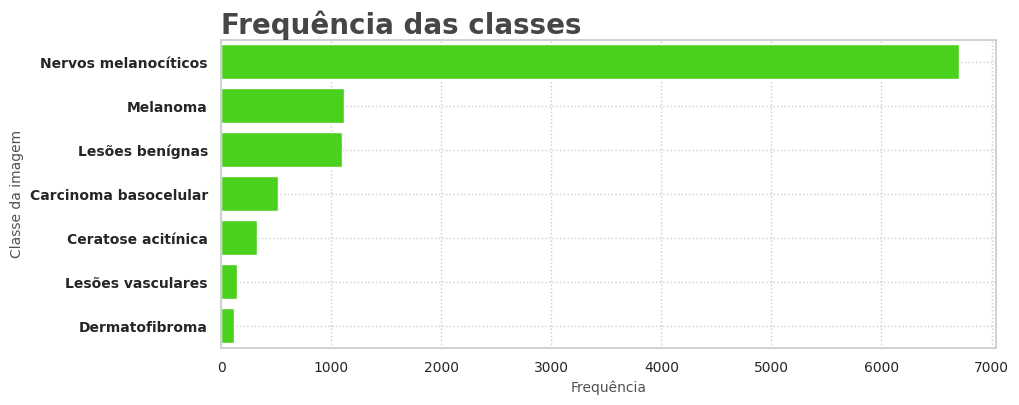

In [ ]:
# Dimensões
plt.figure(figsize = (10,4))

# Gráfico
chart = sns.barplot(data=count_labels,
                    y = 'dx',
                    x = 'count')

# Ambiente
sns.set_style('whitegrid',
              {'grid.linestyle':':'})
chart.grid(.6)
sns.set_palette('prism')

#Eixos
chart.set_ylabel("Classe da imagem",
                 fontsize = 10,
                 alpha = .8)

chart.set_xlabel("Frequência",
                 fontsize = 10,
                 alpha = .8)

chart.set_yticklabels(labels=['Nervos melanocíticos',
                         'Melanoma',
                         'Lesões benígnas',
                         'Carcinoma basocelular',
                         'Ceratose acitínica',
                         'Lesões vasculares',
                         'Dermatofibroma'],
                      size = 10,
                      weight = 'bold'
                 )
chart.tick_params(axis = 'x', labelsize = 10)

# Título
chart.text(s = "Frequência das classes",
           x = 0,
           y = -0.65,
          fontsize = 20,
          fontweight = 'bold',
          alpha = .85);

Conclusão: é evidente o desbalanceamento dos dados.

#### Histogramas de pixels

In [ ]:
# Separando amostra aleatória para análise
amostras = sample(list(dados), k = 1000)
imagem, label = zip(*amostras)

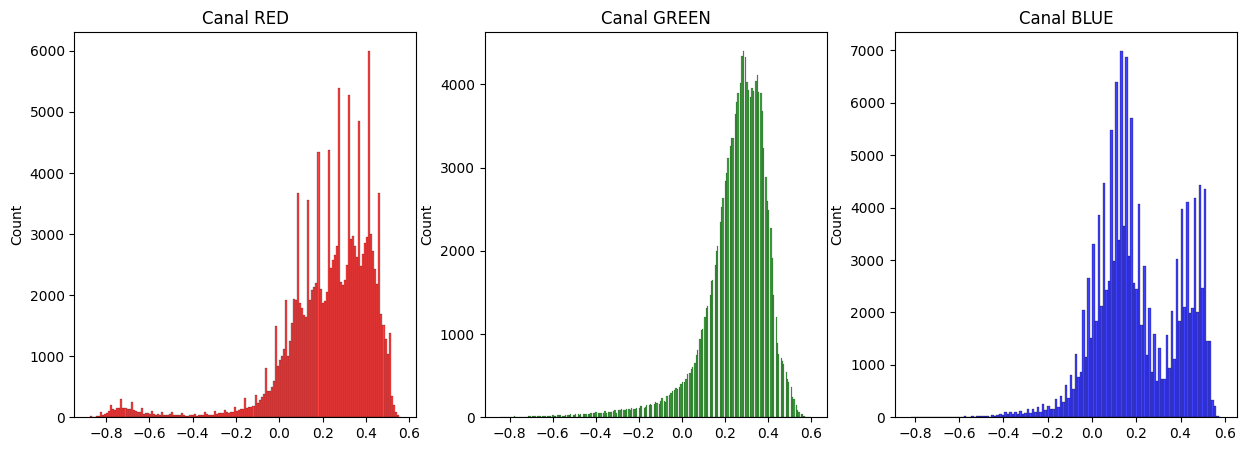

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (15,5))
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
  sns.histplot(imagem[i].flatten(), ax = axs[i], color = color)
  axs[i].set_title(f"Canal {color.upper()}")

Analisando a distribuição dos pixels, podemos ver que a grande maioria das imagens tem boa qualidade (não são muito escuras  - zscore próximo a -1 -, nem concentram uma cor específica - zscore próximo a 1-.

Na fase de engenharia de atributos, vamos realizar o tratamento de eventuais outliers.

#### Divercidade dos dados

In [ ]:
variancias = []
for img in imagem:
  variancia_total = img.numpy().var()
  variancias.append(variancia_total)

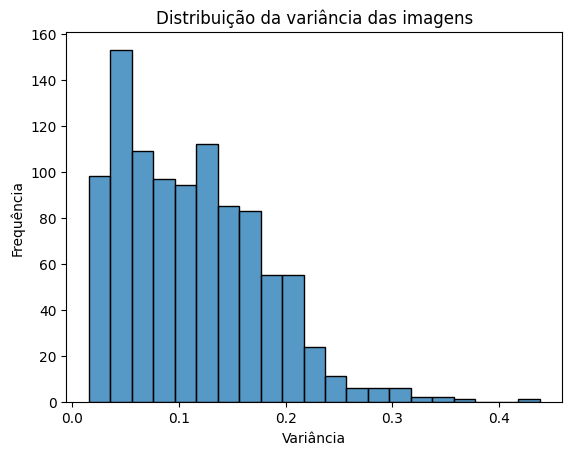

In [ ]:
chart = sns.histplot(variancias)
plt.title("Distribuição da variância das imagens")
chart.set_xlabel("Variância")
chart.set_ylabel("Frequência");

Analisando a distribuição da variância total das imagens, vemos que existe alguma diversidade nas imagens. Vemos um grupo com alta frequência em baixa variância (o que pode significar imagens de fundo limpo, pesões pequenas, cores homogêneas). Conforme vefificamos no início da análise, há um desbalanceamento dos dados extamente na classe que representa lesões comuns.

E, um outro grupo com frequência numa variância um pouco maior (certamente devem representar lesões maiores, variação de cor, etc).

Podemos perceber da assimetria à direta que as imagens pode tem tons mais escurecidos, e, como não há uma alta curtose, podemos concluir que além da vareidade de iluminação, também podemos ter variedade de orientação das imagens.

*Ainda, analisando a diversidade dos dados*, vamos ver se as classes estão visivelmente separadas.

In [ ]:
amostras = []

# achatando tensores
for img in imagem:
    amostras.append(img.numpy().flatten())


# aplicando PCA
pca = PCA(n_components=2)
projecao = pca.fit_transform(amostras)



Text(0.5, 1.0, 'Distribuição PCA das Imagens')

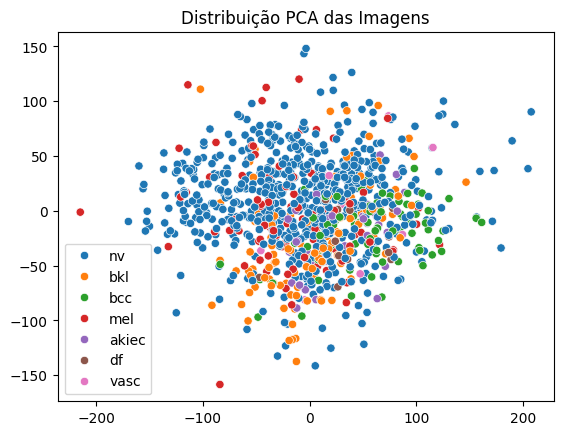

In [ ]:
#visualizando
## mostrando como um problema de compute vision é não linear
sns.scatterplot(x=projecao[:, 0], y=projecao[:, 1], hue = label, palette = 'tab10')
plt.title("Distribuição PCA das Imagens")


#### Visualizando amostra

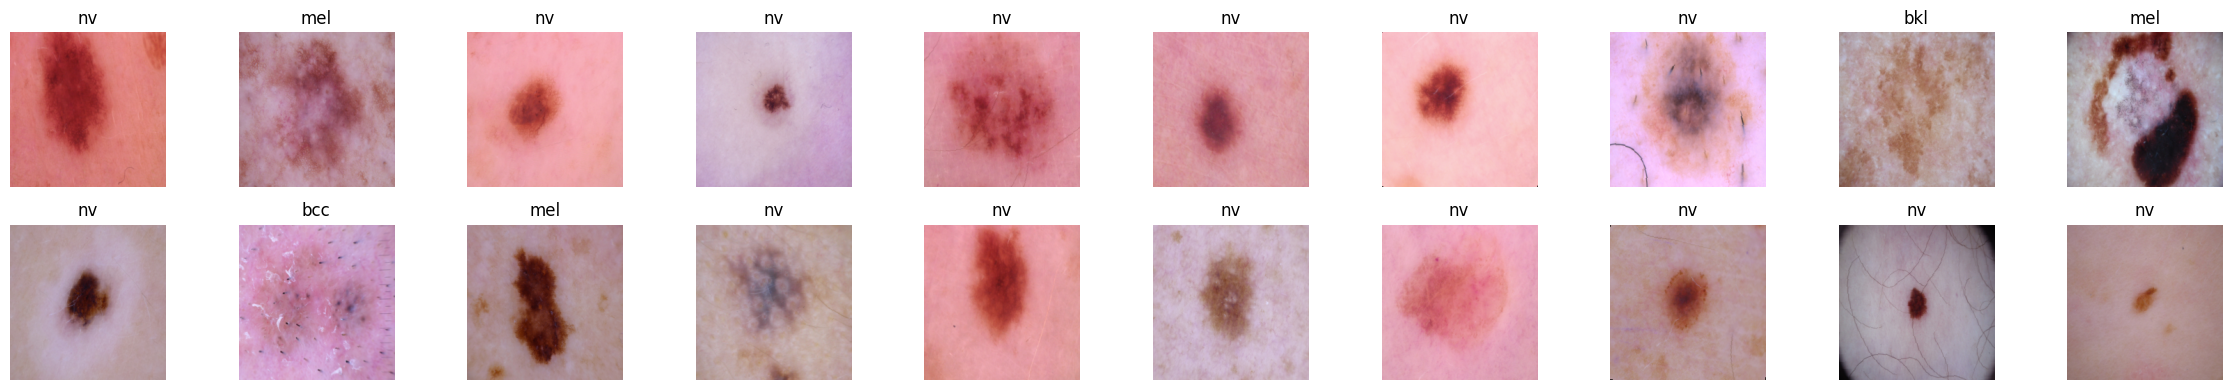

In [ ]:
plot_img(imagem, label)

#### Histograma de bordas

In [ ]:
# também ajuda na identificação da diversidade de imagens, e imagens boas e ruins

#outliers podem representar imagens sem bordas
# gay_list = []
total_proporcao = []

for i in imagem:

  img = i / 2 + .5
  img = img.numpy()
  img = np.transpose(img, (1,2,0))
  img = (img * 255).astype(np.uint8)
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  edges = cv2.Canny(gray, 100,200)
  sum_edge = np.sum(edges > 0)
  pixels = edges.size
  proporcao = sum_edge / pixels
  total_proporcao.append(proporcao)




**Análise** Imagens ofuscas, de baixa luminosidade, mal centralizadas, etc., atrapalham o treinamento do modelo.

Vamos deterctar tais imagens com o histograma de bordas.

<Axes: ylabel='Count'>

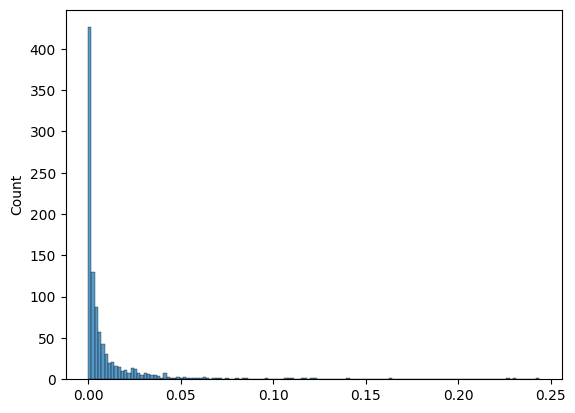

In [ ]:
# Visualizando
sns.histplot(total_proporcao);

In [ ]:
# plotar imagem e respectiva borda
limiar = 0.005
array_proporcao = np.array(total_proporcao)
limiar_imgs = np.where(array_proporcao < limiar)[0]

print("Numero de imagens com bordas quase nulas: ", len(limiar_imgs))


Numero de imagens com bordas quase nulas:  632


In [ ]:

labels_bordas_baixas = [label[i] for i in limiar_imgs]
contagem = Counter(labels_bordas_baixas)

print("Proporção de imagens sem bordas por classe.")
for classe, qtd in contagem.items():
  print(f"Classe {classe}: {round(qtd / len(limiar_imgs), 2)}%")

Proporção de imagens sem bordas por classe.
Classe nv: 63.57%
Classe mel: 5.57%
Classe akiec: 3.29%
Classe bcc: 6.43%
Classe bkl: 9.29%
Classe df: 1.57%
Classe vasc: 0.57%


**Análise**

A maioria das imagens quase sem borda é da classe *nv*, justamente a classe que está causando o desbalanceamento dos dados.

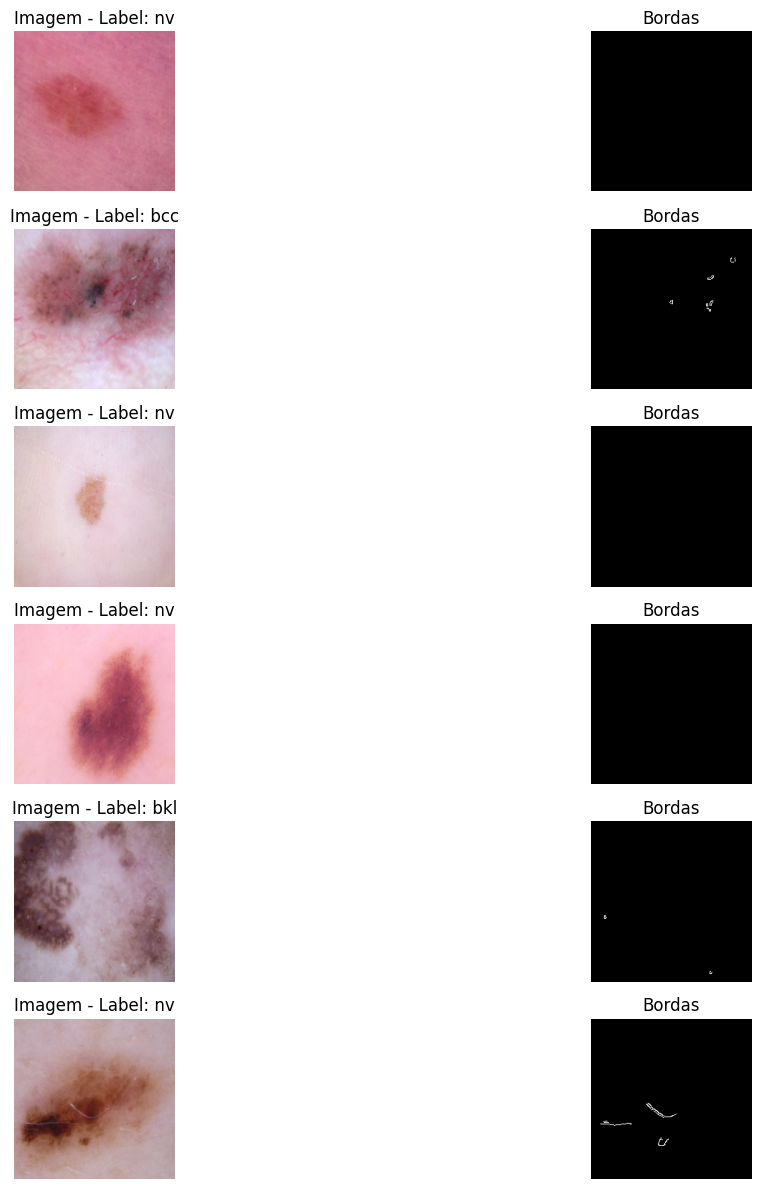

In [ ]:
fig = plt.figure(figsize=(16, 12))

for i in range(6):  # Vamos mostrar 6 imagens com suas bordas

    idx = random.choice(limiar_imgs)

    # Pré-processa a imagem
    img = imagem[idx]
    img_vis = img / 2 + 0.5
    img_vis = img_vis.numpy()
    img_vis = np.transpose(img_vis, (1, 2, 0))
    img_uint8 = (img_vis * 255).astype(np.uint8)

    # Gera as bordas
    gray = cv2.cvtColor(img_uint8, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray, 100, 200)

    # Plot imagem original
    ax1 = fig.add_subplot(6, 2, i * 2 + 1)
    ax1.imshow(img_uint8)
    ax1.set_title(f"Imagem - Label: {label[idx]}")
    ax1.axis("off")

    # Plot bordas
    ax2 = fig.add_subplot(6, 2, i * 2 + 2)
    ax2.imshow(edges, cmap='gray')
    ax2.set_title("Bordas")
    ax2.axis("off")

plt.tight_layout()
plt.show()


**Análise**

É possível concluir que, de fato, o limiar aplicado é um bom filtro para eliminar imagens que não possuam bordar em algum nível de destaque.

## Feature Engineer (como etapa)

- Tratamento de outliers

In [ ]:
## aplicando classe que verifica outliers (imagens ruins)
imagens_ruins = clean_imagen().apply(amostra = amostras)

In [ ]:
len(imagens_ruins)

0

**Análise**

Considerando a amostra, não temos imagens muito escuras ou muito claras. Portanto, não temos outliers, considerando a ausência de cores RGB.

Vamos avaliar, agora, os outliers, pelo viés da análise de bordas.

Vimos acima que temos muitas imagens sem bordas, e, que, quase 64% delas são da classe 'nv':


Proporção de imagens sem bordas por classe.

|Classe | % |
|-------|----|
|nv | 63.57%|
mel| 5.57%
akiec| 3.29%
bcc| 6.43%
bkl| 9.29%
df:| 1.57%
vasc| 0.57%

In [ ]:
# Eliminando outliers

**Análise**

Na primeira versão, vamos manter o dataset original. Apenas na segunda versão vamos eliminar os outliers, e reanalisar o balanceamento dos dados.

- Balanceamento de classes, se necessário.



**Análise**

Se aplicado diretamente na função de loss, no treinamento do modelo

## Pré-processamento

### Formatação


1 - As variáveis já foram convertidas em tensores (no carregamento);

2 - Limpeza realizada conforme determinado no tratamento de outliers.

- Duplicados

In [ ]:
to_pil = transforms.ToPILImage()
imgs = [to_pil(img) for img in imagem]
hashes = [imagehash.phash(img) for img in imgs]

# matriz de distancia
dist_matriz = np.zeros((len(hashes), len(hashes)))

for i in range(len(hashes)):
  for j in range(len(hashes)):
    dist_matriz[i, j] = hashes[i] - hashes[j]


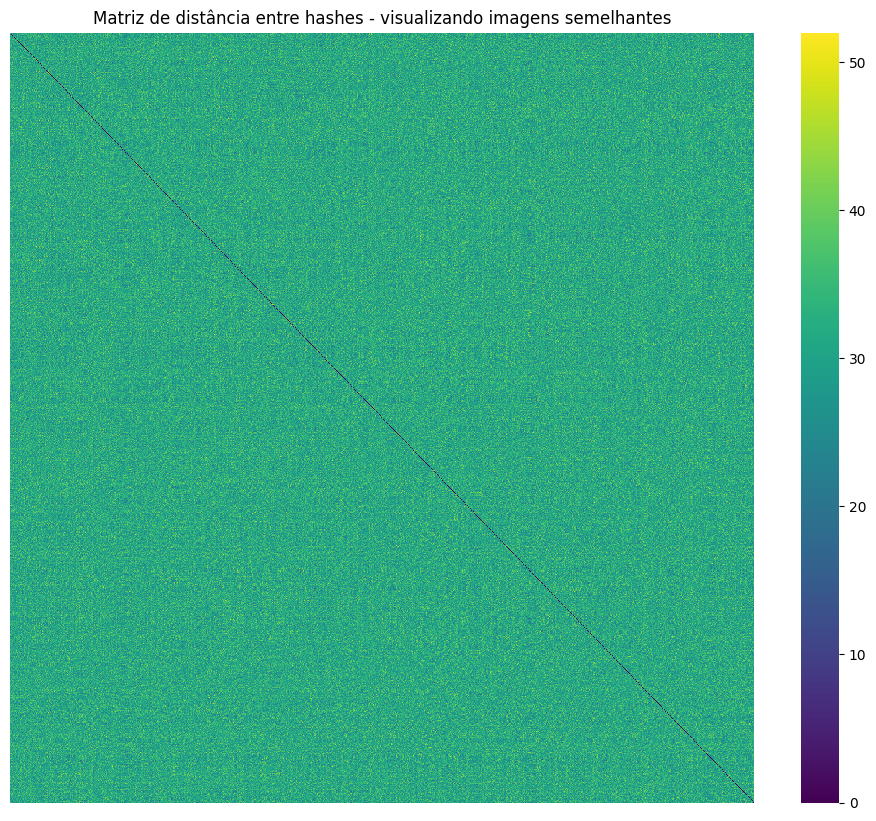

In [ ]:
#visualuzando
plt.figure(figsize = (12,10))
sns.heatmap(dist_matriz, cmap = 'viridis')
plt.title("Matriz de distância entre hashes - visualizando imagens semelhantes")
plt.axis('off')
plt.show()

**Análise**

Diferenças pequenas entre os hashes (entre 0-5) podem gerar a conclusão de as imagens são praticamente idênticas, conforme mostra o tom da diagonal da matriz. Visualmente, **não temos imagens duplicadas.**

## Split da base

In [ ]:
#Split
train, test, validation = random_split(dados, [.7, .15, .15])

- Casting para dataloaders

In [ ]:
loader_train = DataLoader(train, batch_size = 20,  num_workers = 0)
loader_validation = DataLoader(validation, batch_size = 20,  num_workers = 0)
loader_test = DataLoader(test, batch_size = 20,  num_workers = 0)

## Escolha do algoritmo e arquitetura


Utilzaremos Redes Neurais Artificiais com camadas ocultas (Deep Learning), com redes especializadas para o treinamento do modelo.

Na primeira versão:

**No forward**

1 - Aplicaremos 3 camadas de convolução;

2 - Na saída de cada camada oculta aplicaremos Maxpool (para ajustar a dimensão das matrizes), e, Relu como função de ativação.

3 - Utilizaremos dropout para redução do risco de overfitting

4 - A saída é composta de camadas densamente conectadas

**No backward**

5 - Entropia Cruzada Binária como função de custo

6 - SGD como otimizador

## Treinamento

In [ ]:
# Instanciando a rede
model = Net()

In [ ]:
# levando para GPU
model.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): LazyLinear(in_features=0, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=7, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [ ]:
# classes
classes = {class_names: idx for idx, class_names in enumerate(dados.img_labels.dx.unique())}
classes

{'bkl': 0, 'nv': 1, 'df': 2, 'mel': 3, 'vasc': 4, 'bcc': 5, 'akiec': 6}

In [ ]:
# loss function e otimizador
criterion = nn.CrossEntropyLoss()


In [ ]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)

# Armazenar o loss para plotar num gráfico de comparação, calcular as demais métricas de desempenho

In [ ]:
# Treinando - visualização do treinamento persistência do melhor modelo
model_treined = train_model(modelo = model, optimizer = optimizer, criterion = criterion, loader_train = loader_train, loader_validation = loader_validation, classes= classes)


Epoch: 0:	Erro em treinamento ==> 0.053995	Erro em validação ==> 0.047923	Acurácia ==> 0.681092

Erro em validação reduzido inf ===> 0.047923.	Salvando...

Epoch: 1:	Erro em treinamento ==> 0.046811	Erro em validação ==> 0.044526	Acurácia ==> 0.691744

Erro em validação reduzido 0.047923 ===> 0.044526.	Salvando...

Epoch: 2:	Erro em treinamento ==> 0.044778	Erro em validação ==> 0.042975	Acurácia ==> 0.689081

Erro em validação reduzido 0.044526 ===> 0.042975.	Salvando...


## Avaliação

In [ ]:
## Convertendo para índices de classes
idx_to_class = {v: k for k, v in classes.items()}
idx_to_class

{0: 'bkl', 1: 'nv', 2: 'df', 3: 'mel', 4: 'vasc', 5: 'bcc', 6: 'akiec'}

In [ ]:
# Aplicando em teste

tm = TransformModel(model_treined, criterion, loader_test, classes, idx_to_class)
preds, targets = tm.predict()

In [ ]:
#Visualizando métricas globais
tm.evaluate_model(preds, targets)


Erro médio em teste: 0.042245
Acurácia total: 70.77%
f1 total: 70.77%


In [ ]:
# Visualizando acruária por classe
tm.evaluate_classes(preds, targets)

Acurácia da classe bkl: 43.11%
Acurácia da classe nv: 97.23%
Acurácia da classe df: 0.0%
Acurácia da classe mel: 0.0%
Acurácia da classe vasc: 0.0%
Acurácia da classe bcc: 13.92%
Acurácia da classe akiec: 0.0%


**Análise das métricas: modelo v1**

- Globais

Ainda estamos longe do alvo buscado (acurácia em 70%), o que demandará otimização do modelo.

Inicalmente, destacaremos algumas melhorias que podem ser feitas, conforme já identificado na fase de EDA do projeto:



1.   Classes desbalanceadas:

De imediato, podemos retreinar o modelo sanando este problema. Utilizaremos, para tanto, a função de erro do modelo.


2.   Imagens de baixa qualidade:

Conforme visualizado, mais de 60% das imagens de classe 'nv' são de baixa qualidade. O modelo não consegue destacar as bordas as imagens, o que, em teoria, pode atrapalhar o treinamento.


**Redomentação**
Inicialmente, vamos retreinar o modelo apenas tratando do desbalanceamento das classes (modelov2). Após, removeremos as imagens de baixa qualidade, e, então faremos o treinamento do modelo sem as imagens ruins e com o balanciamento das classes (modelov3).



## Otimização

*Recomendações para otimização**

## Treinando modelov2

*Definindo pesos para baleceamento dos dados*

In [ ]:
count_target = count_labels.set_index('dx').to_dict()
count_target = count_target['count']
classes = {class_names: idx for idx, class_names in enumerate(dados.img_labels.dx.unique())}
num_classes = len(classes)


In [ ]:
total = sum(count_target.values())
pesos = [0.0] * num_classes
for nome, idx in (classes.items()):
  pesos[idx] = total / count_target[nome]

pesos = torch.tensor(pesos, dtype=torch.float32).cuda()

Redefinindo função de custo

In [ ]:
# loss function e otimizador
criterion_v2 = nn.CrossEntropyLoss(weight=pesos)

Treinando v2 (com dados balanceados)

In [ ]:
# Treinando - visualização do treinamento persistência do melhor modelo
model_treined_v2 = train_model(modelo = model, optimizer = optimizer, criterion = criterion_v2, loader_train = loader_train, loader_validation = loader_validation, classes= classes)


Epoch: 0:	Erro em treinamento ==> 0.093834	Erro em validação ==> 0.087657	Acurácia ==> 0.140479

Erro em validação reduzido inf ===> 0.087657.	Salvando...

Epoch: 1:	Erro em treinamento ==> 0.086221	Erro em validação ==> 0.084961	Acurácia ==> 0.322237

Erro em validação reduzido 0.087657 ===> 0.084961.	Salvando...

Epoch: 2:	Erro em treinamento ==> 0.083703	Erro em validação ==> 0.085054	Acurácia ==> 0.409454


## Avaliação modelov2

Aplicando em teste

In [ ]:
# Aplicando em teste

tm2 = TransformModel(model_treined_v2, criterion_v2, loader_test, classes, idx_to_class)
preds, targets = tm2.predict()

Avaliando métricas globais v2

In [ ]:
#Visualizando métricas globais
tm2.evaluate_model(preds, targets)


Erro médio em teste: 0.085329
Acurácia total: 40.01%
f1 total: 40.01%


Avaliando métricas por classe v2

In [ ]:
# Visualizando acruária por classe
tm2.evaluate_classes(preds, targets)

Acurácia da classe bkl: 9.94%
Acurácia da classe nv: 45.63%
Acurácia da classe df: 29.41%
Acurácia da classe mel: 31.21%
Acurácia da classe vasc: 0.0%
Acurácia da classe bcc: 81.93%
Acurácia da classe akiec: 7.69%


**Análise**

O modelo ganhou equidade com o balanceamento das classes. Antes apenas 'chutava' a previsão como sendo da classe majoritária (nv) que causava profundo desbalanceamento dos dados; agora, houve um real aprendizado como um todo, ou seja, o modelo conseguiu identificar características das classes monoritárias.

Mas, ainda pode-se avançar com mais versões em busca de melhorar a precisão.

## Otimização modelov2

Vamos realizar novo treinamento (modelov3) removendo as imagens de baixa qualidade. Depois, vamos calcular novamente o balanceamento.

## Treinando modelov3

In [ ]:
# Obtendo dados
imagens, labels = zip(*dados)

In [ ]:
# Calculando bordas
total_proporcao = []

for i, img in enumerate(imagens):

  # limpando a classe que causa desbalanceamento
  if labels[i] == 'nv':
    img = img / 2 + .5
    img = img.numpy()
    img = np.transpose(img, (1,2,0))
    img = (img * 255).astype(np.uint8)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray, 100,200)
    sum_edge = np.sum(edges > 0)
    pixels = edges.size
    proporcao = sum_edge / pixels
    total_proporcao.append(proporcao)


In [ ]:
## filtrando dados
limiar = 0.005
array_proporcao = np.array(total_proporcao)
limiar_imgs = np.where(array_proporcao >= limiar)[0]

print("Numero de imagens com boa qualidade de bordas: ", len(limiar_imgs))


In [ ]:
#aplicar o filtro só se for nv
limiar = 0.005
# labels_bordas = [labels[i] for i in limiar_imgs]
# imagem_bordas = [imagens[i] for i in limiar_imgs]
labels_bordas = []
imagem_bordas = []

for i in range(len(imagens)):
  if labels[i] == 'nv':
      img = imagens[i] / 2 + .5
      img = img.numpy()
      img = np.transpose(img, (1,2,0))
      img = (img * 255).astype(np.uint8)
      gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
      edges = cv2.Canny(gray, 100,200)
      sum_edge = np.sum(edges > 0)
      pixels = edges.size
      proporcao = sum_edge / pixels
      if proporcao >= limiar:
        labels_bordas.append(labels[i])
        imagem_bordas.append(imagens[i])
  else:
    labels_bordas.append(labels[i])
    imagem_bordas.append(imagens[i])





In [ ]:
contagem = Counter(labels_bordas)

print("Propoção de imagens com boa qualidade de bordas por classe.")
for classe, qtd in contagem.items():
  print(f"Classe {classe}: {round(qtd/len(limiar_imgs)*100, 2)}% = {qtd}")

Propoção de imagens com boa qualidade de bordas por classe.
Classe bkl: 53.93% = 1099
Classe df: 5.64% = 115
Classe mel: 54.61% = 1113
Classe vasc: 6.97% = 142
Classe bcc: 25.22% = 514
Classe nv: 100.0% = 2038
Classe akiec: 16.05% = 327


**Análise**

O desbalanceamento entre classes ainda é muito grande. Vamos seguir o plano de otimização original, e treinar os dados com este modelo.

Vamos recarregar os dados como dataloaders, e calcular os pesos de balanceamento.

In [ ]:
class ImagemBordasDataset(Dataset):
  def __init__(self, imagens, labels):
    self.imagens = imagens
    self.labels = labels

  def __len__(self):
    return len(self.imagens)

  def __getitem__(self, idx):
     imagem = self.imagens[idx]
     label = self.labels[idx]
     return imagem, label

In [ ]:
dataset_boas = ImagemBordasDataset(imagens, labels)

In [ ]:
# Recarregando dataloaders
train, test, validation = random_split(dataset_boas, [.7, .15, .15])
loader_train = DataLoader(train, batch_size = 20,  num_workers = 0)
loader_validation = DataLoader(validation, batch_size = 20,  num_workers = 0)
loader_test = DataLoader(test, batch_size = 20,  num_workers = 0)

In [ ]:
# Recalculando distribuição dos pesos
# count_target = count_labels.set_index('dx').to_dict()
# count_target = count_target['count']
classes = {class_names: idx for class_names, idx in contagem.items()}
num_classes = len(classes)


In [ ]:
#OBS: a estratégia anterior de pesos (inversa da contage causou um colapso no modelo, devido ao forte desbalaceamento que ainda permanece)
# Vamos adotar uma estratégia mais simples, baseada na própria frequência das classes
frequencias = torch.tensor([471, 42, 623, 54, 201, 2025, 157], dtype=torch.float)
pesos = 1.0 / (frequencias + 1e-6)
pesos = pesos / pesos.sum() * len(frequencias)
pesos

tensor([0.2567, 2.8788, 0.1941, 2.2391, 0.6015, 0.0597, 0.7701])

In [ ]:
pesos = torch.tensor(pesos, dtype=torch.float32).cuda()

In [ ]:
# loss function e otimizador
criterion_v3 = nn.CrossEntropyLoss()


In [ ]:
# Treinando - visualização do treinamento persistência do melhor modelo
model_treined_v3 = train_model(modelo = model, optimizer = optimizer, criterion = criterion_v3, loader_train = loader_train, loader_validation = loader_validation, classes= classes)

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


## Avaliação modelov3

Aplicando em teste

In [ ]:
# Aplicando em teste

tm3 = TransformModel(model_treined_v3, criterion_v3, loader_test, classes, idx_to_class)
preds, targets = tm3.predict()

Métricas globais

In [ ]:
#Visualizando métricas globais
tm3.evaluate_model(preds, targets)

Métricas por classes

In [ ]:
#Visualizando métricas globais
tm3.evaluate_classes(preds, targets)

Acurácia da classe bkl: 0.0%
Acurácia da classe nv: 99.9%
Acurácia da classe df: 0.0%
Acurácia da classe mel: 3.8%
Acurácia da classe vasc: 0.0%
Acurácia da classe bcc: 0.0%
Acurácia da classe akiec: 6.45%


## Conclusão e documentação

Os dados são insuficientes para dar continuidade ao projeto neste formato (classificação multiclasses).

Com as dimensões originais, os dados apresentam-se desbalanceados, e, quando uma proporção muito grande de imagens de baixa qualidade.

O primeiro modelo (treinado com as imagens sem tratamento) demonstrou que o modelo observou demasiadamente a classe 'nv', e, mesmo aprensentando uma acurácia inicial expressiva, ao se verificar a acurácia entre as classes, viu-se um modelo desequilibrado. Por isso, aliás, não houve a necessidade de calcular demais métricas de desempenho.

Após, tentou-se uma segunda versão, aplicando a proporção inversa do desbalanceamento como pesos da função de perda, e, conforme demonstra a acurária entre classes, o modelo conseguiu aprender mais que a versão 1 sobre as demais classes. Entretanto, aprensentando baixa acurária (exceto quanto a bcc).

Por fim, eliminou-se as imagens com baixa qualidade de borda da classe 'nv'. Na versão aqui demostrada calculamos sem pesos na função de loss (pois, como temos poucos dados agora, a tentantiva de balancear provou causar colpso no treinamento). Por fim, a versão 3, na mesma forma da versão 1, demonstrou hiperfoco na classe mais frequente.

Assim temos o seguinte cenário, ora temos um modelo altamente enviesado, ora temos um modelo que sofre de underfitting.



**Seluções possíveis**

I - Aumentar a amostra, possibilitando treinar melhor todas as classes e resolver o problema do desbalanceamento;

II - Aplicaremos engenharia de atributos para reformular o projeto. Depois de elimianr as imagens ruins, vamos dividir as classes em 'nv' e 'not-nv', faremos o balanceamento, e treinaremos um modelo (modelov4.1), após, somente com o segundo dataset (mas com todos os rótulos - exceto 'nv -), faremos o treinamento do modelov4.2.

Neste caso, o melhor seria recomeçar o projeto com foco na classificação binária, já que, muitas mudanças na arquitetura e demais funções se fazem necessárias. Ao final, teríamos  2 modelos, um para excluir a possibilidade de não ser 'nv', e, sendo 'nv', um modelo especializado.


## Deploy

Faremos o dploy dos 3 modelos acima, permitando o carregamento de foto. Assim, podemos ver como um modelo mal treinado impacta na previsão.

Não ter nenhum modelo é melhor do que confiar num modelo mal treinado!